In [35]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [36]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [37]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [38]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [39]:
tf.keras.backend.clear_session()

In [40]:
subject = 'Santa_Catarina - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [41]:
data = pd.read_csv('2003_raw_Santa_Catarina_input.csv')
pd.set_option('display.max_columns', None)
data = data.replace(-1.0, np.nan)
data

,data,Santa_Catarina - PIB - Per Capita,Santa_Catarina - PIB - Preços de Mercado,Santa_Catarina - PIB - Estadual,Santa_Catarina - PIB - Construção Civil,Santa_Catarina - População,Santa_Catarina - INCC (%),Santa_Catarina - IPCA - Variação mensal durante o Plano Real (%),Santa_Catarina - IGP-DI,Santa_Catarina - Taxa Selic (%),Santa_Catarina - IDH - Longevidade,Santa_Catarina - IDH - Renda,Santa_Catarina - IDH - Educação,Santa_Catarina - NFSP - Fluxo Mensal (Milhões de reais),Santa_Catarina - Estoque liquido de capital fixo - (R$),Santa_Catarina - Desemprego,Santa_Catarina - Produção de Cimento (t),Santa_Catarina - Valor,Santa_Catarina - Consumo de Cimento (t)
0,2003-01-01,7.495952e+06,3.945766e+06,1.356069,5.423062e+06,5527707.0,1.70,12.53,2.70,0.082293,0.812,0.717,0.526,3.46,6.098524e+06,4.990287,NaN,0.3800,142456.0
1,2003-02-01,7.495952e+06,3.945766e+06,1.356069,5.423062e+06,5527707.0,1.51,2.25,2.17,0.088771,0.812,0.717,0.526,3.59,6.172460e+06,4.990287,27767.0,0.3800,135829.0
2,2003-03-01,7.495952e+06,3.945766e+06,1.356069,5.423062e+06,5527707.0,1.39,3.86,1.59,0.090733,0.812,0.717,0.526,3.84,6.172460e+06,4.990287,39181.0,0.3800,133135.0
3,2003-04-01,7.495952e+06,3.945766e+06,1.356069,5.423062e+06,5527707.0,1.38,5.13,1.66,0.092749,0.812,0.717,0.526,3.95,6.172460e+06,4.990287,128187.0,0.3800,144723.0
4,2003-05-01,7.495952e+06,3.945766e+06,1.356069,5.423062e+06,5527707.0,0.90,6.15,0.41,0.092758,0.812,0.717,0.526,4.06,6.172460e+06,4.990287,66252.0,0.3800,150523.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08-01,1.224351e+07,2.065900e+07,1.735954,7.026914e+06,7075494.0,0.58,2.42,-0.01,0.024620,0.870,0.780,0.780,0.69,7.827728e+06,12.300000,67192.0,0.4460,299284.0
200,2019-09-01,1.224351e+07,2.065900e+07,1.735954,7.026914e+06,7075494.0,0.42,2.54,-0.51,0.022751,0.870,0.780,0.780,0.62,7.827728e+06,12.000000,NaN,0.4490,284550.0
201,2019-10-01,1.224351e+07,2.065900e+07,1.735954,7.026914e+06,7075494.0,0.46,2.49,0.50,0.022035,0.870,0.780,0.780,0.59,7.827728e+06,11.900000,66400.0,0.4452,307576.0
202,2019-11-01,1.224351e+07,2.065900e+07,1.735954,7.026914e+06,7075494.0,0.18,2.60,0.55,0.020790,0.870,0.780,0.780,0.57,7.827728e+06,11.700000,NaN,0.4452,281317.0


In [42]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data = target_data/1000
target_data

0      134.837
1      136.495
2      154.807
3      146.582
4      149.537
        ...   
199        NaN
200        NaN
201        NaN
202        NaN
203        NaN
Name: Santa_Catarina - Consumo de Cimento (t), Length: 204, dtype: float64

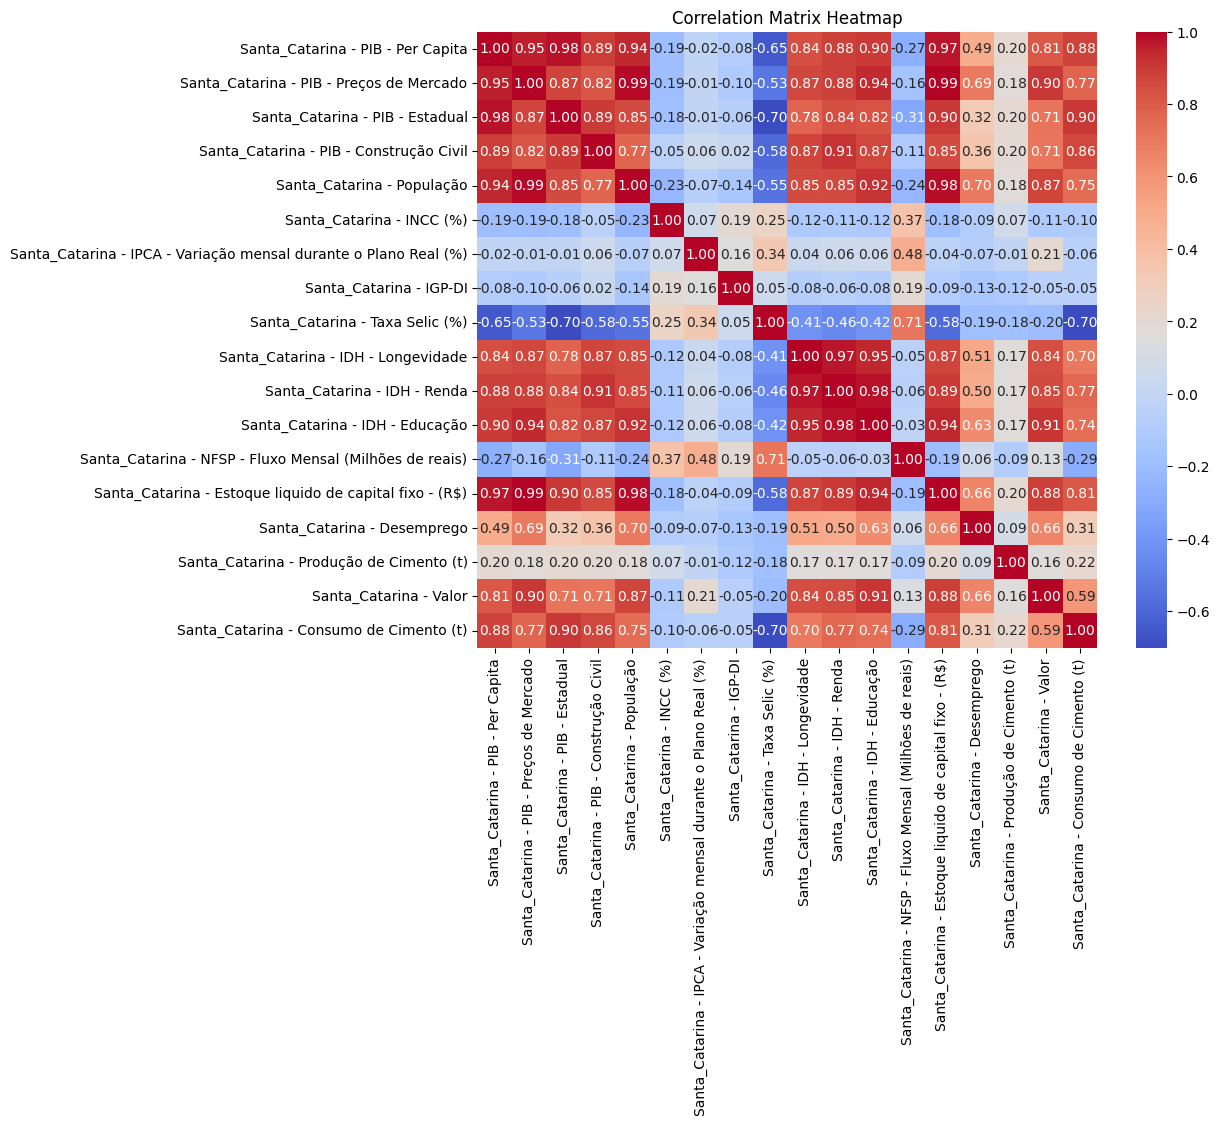

In [43]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [44]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
# scaler=MinMaxScaler()
# scaled_data = scaler.fit_transform(input_data)
# input_data = pd.DataFrame(scaled_data, columns=input_data.columns)
input_data = input_data.fillna(0.0)
input_data

,Santa_Catarina - PIB - Per Capita,Santa_Catarina - PIB - Preços de Mercado,Santa_Catarina - PIB - Estadual,Santa_Catarina - PIB - Construção Civil,Santa_Catarina - População,Santa_Catarina - INCC (%),Santa_Catarina - IPCA - Variação mensal durante o Plano Real (%),Santa_Catarina - IGP-DI,Santa_Catarina - Taxa Selic (%),Santa_Catarina - IDH - Longevidade,Santa_Catarina - IDH - Renda,Santa_Catarina - IDH - Educação,Santa_Catarina - NFSP - Fluxo Mensal (Milhões de reais),Santa_Catarina - Estoque liquido de capital fixo - (R$),Santa_Catarina - Desemprego,Santa_Catarina - Produção de Cimento (t),Santa_Catarina - Valor
0,-1.613001,-1.359718,-1.598308,-0.977821,-1.556210,1.998868,4.052332,3.466715,2.303195,-0.910429,-0.935102,-0.916806,3.108599,-1.539424,-0.575717,0.000000,-0.548083
1,-1.613001,-1.359718,-1.598308,-0.977821,-1.556210,1.647487,-0.596188,2.630940,2.745235,-0.910429,-0.935102,-0.916806,3.275709,-1.411460,-0.575717,-0.864551,-0.548083
2,-1.613001,-1.359718,-1.598308,-0.977821,-1.556210,1.425561,0.131839,1.716318,2.879123,-0.910429,-0.935102,-0.916806,3.597074,-1.411460,-0.575717,-0.769953,-0.548083
3,-1.613001,-1.359718,-1.598308,-0.977821,-1.556210,1.407068,0.706121,1.826703,3.016721,-0.910429,-0.935102,-0.916806,3.738475,-1.411460,-0.575717,-0.032284,-0.548083
4,-1.613001,-1.359718,-1.598308,-0.977821,-1.556210,0.519367,1.167355,-0.144465,3.017322,-0.910429,-0.935102,-0.916806,3.879875,-1.411460,-0.575717,-0.545593,-0.548083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.841704,1.630784,0.256442,0.490028,1.705684,-0.590259,-0.966985,-1.264088,-0.729479,1.304128,0.975967,1.363240,-0.374997,1.441346,3.051690,-0.083983,1.166469
176,0.841704,1.630784,0.256442,0.490028,1.705684,-0.479297,-0.881068,-0.412544,-0.941281,1.304128,0.975967,1.363240,-0.439270,1.441346,3.051690,-0.961154,1.166469
177,0.841704,1.630784,0.256442,0.490028,1.705684,-1.034110,-0.808718,0.186692,-1.140710,1.304128,0.975967,1.363240,-0.503543,1.441346,3.051690,-0.519229,1.170056
178,0.841704,1.630784,0.256442,0.490028,1.705684,-0.571766,-0.614276,-0.633314,-1.226481,1.304128,0.975967,1.363240,-0.503543,1.441346,3.104187,0.000000,1.223860


In [45]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Santa_Catarina - PIB - Per Capita,Santa_Catarina - PIB - Preços de Mercado,Santa_Catarina - PIB - Estadual,Santa_Catarina - PIB - Construção Civil,Santa_Catarina - População,Santa_Catarina - INCC (%),Santa_Catarina - IPCA - Variação mensal durante o Plano Real (%),Santa_Catarina - IGP-DI,Santa_Catarina - Taxa Selic (%),Santa_Catarina - IDH - Longevidade,Santa_Catarina - IDH - Renda,Santa_Catarina - IDH - Educação,Santa_Catarina - NFSP - Fluxo Mensal (Milhões de reais),Santa_Catarina - Estoque liquido de capital fixo - (R$),Santa_Catarina - Desemprego,Santa_Catarina - Produção de Cimento (t),Santa_Catarina - Valor
0,-1.613001,-1.359718,-1.598308,-0.977821,-1.556210,1.998868,4.052332,3.466715,2.303195,-0.910429,-0.935102,-0.916806,3.108599,-1.539424,-0.575717,0.000000,-0.548083
1,-1.613001,-1.359718,-1.598308,-0.977821,-1.556210,1.647487,-0.596188,2.630940,2.745235,-0.910429,-0.935102,-0.916806,3.275709,-1.411460,-0.575717,-0.864551,-0.548083
2,-1.613001,-1.359718,-1.598308,-0.977821,-1.556210,1.425561,0.131839,1.716318,2.879123,-0.910429,-0.935102,-0.916806,3.597074,-1.411460,-0.575717,-0.769953,-0.548083
3,-1.613001,-1.359718,-1.598308,-0.977821,-1.556210,1.407068,0.706121,1.826703,3.016721,-0.910429,-0.935102,-0.916806,3.738475,-1.411460,-0.575717,-0.032284,-0.548083
4,-1.613001,-1.359718,-1.598308,-0.977821,-1.556210,0.519367,1.167355,-0.144465,3.017322,-0.910429,-0.935102,-0.916806,3.879875,-1.411460,-0.575717,-0.545593,-0.548083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.123814,1.486265,0.793195,0.844227,1.490174,-0.238878,0.629248,-1.406012,0.272188,1.304128,1.084141,1.273474,0.794771,1.416222,1.476773,0.000000,1.758313
164,1.123814,1.486265,0.793195,0.844227,1.490174,-0.608753,0.837256,-0.112926,0.272188,1.304128,1.084141,1.273474,0.730498,1.416222,1.529271,0.000000,2.020158
165,1.123814,1.486265,0.793195,0.844227,1.490174,-0.534778,0.877953,-0.743700,0.272188,1.304128,1.084141,1.273474,0.743353,1.416222,1.581768,0.000000,1.973528
166,1.123814,1.486265,0.793195,0.844227,1.490174,-0.756703,1.000045,-0.586006,0.248413,1.304128,1.084141,1.273474,0.614807,1.416222,1.581768,0.000000,1.819290


In [46]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0      134.837
1      136.495
2      154.807
3      146.582
4      149.537
        ...   
163    277.811
164    235.885
165    272.671
166    278.592
167    214.658
Name: Santa_Catarina - Consumo de Cimento (t), Length: 168, dtype: float64

In [47]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [48]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [49]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Santa_Catarina - PIB - Per Capita,Santa_Catarina - PIB - Preços de Mercado,Santa_Catarina - PIB - Estadual,Santa_Catarina - PIB - Construção Civil,Santa_Catarina - População,Santa_Catarina - INCC (%),Santa_Catarina - IPCA - Variação mensal durante o Plano Real (%),Santa_Catarina - IGP-DI,Santa_Catarina - Taxa Selic (%),Santa_Catarina - IDH - Longevidade,Santa_Catarina - IDH - Renda,Santa_Catarina - IDH - Educação,Santa_Catarina - NFSP - Fluxo Mensal (Milhões de reais),Santa_Catarina - Estoque liquido de capital fixo - (R$),Santa_Catarina - Desemprego,Santa_Catarina - Produção de Cimento (t),Santa_Catarina - Valor
132,1.133177,0.983088,1.099036,0.964072,1.053943,-0.960135,1.058830,0.297077,-0.755853,0.842762,1.084141,1.183709,-0.285015,0.834026,0.636818,-0.779791,0.527996
133,1.133177,0.983088,1.099036,0.964072,1.053943,0.482379,-1.364912,-0.160234,-0.688658,0.842762,1.084141,1.183709,-0.349288,1.129318,0.899304,0.000000,0.527996
134,1.133177,0.983088,1.099036,0.964072,1.053943,-0.534778,-1.052901,0.549386,-0.626634,0.842762,1.084141,1.183709,-0.374997,1.129318,1.056796,0.000000,0.527996
135,1.133177,0.983088,1.099036,0.964072,1.053943,-0.627247,-0.627842,1.542855,-0.571481,0.842762,1.084141,1.183709,-0.259306,1.129318,0.951801,0.000000,0.527996
136,1.133177,0.983088,1.099036,0.964072,1.053943,0.482379,-0.320352,-0.081387,-0.516512,0.842762,1.084141,1.183709,-0.053632,1.129318,0.846807,0.000000,0.886689
137,1.133177,0.983088,1.099036,0.964072,1.053943,2.646150,-0.107822,-1.500628,-0.510405,0.842762,1.084141,1.183709,0.023495,1.129318,0.741812,0.000000,0.886689
138,1.133177,0.983088,1.099036,0.964072,1.053943,0.075516,0.082098,-1.784477,-0.510405,0.842762,1.084141,1.183709,-0.002214,1.129318,0.689315,0.000000,1.066035
139,1.133177,0.983088,1.099036,0.964072,1.053943,0.241960,0.086620,-1.658322,-0.510405,0.842762,1.084141,1.183709,-0.143614,1.129318,0.584321,0.000000,1.066035
140,1.133177,0.983088,1.099036,0.964072,1.053943,-0.997122,0.204189,-0.696392,-0.510054,0.842762,1.084141,1.183709,-0.182178,1.129318,0.479326,0.000000,1.066035
141,1.133177,0.983088,1.099036,0.964072,1.053943,-0.867666,0.470982,-0.759469,-0.510405,0.842762,1.084141,1.183709,-0.105051,1.129318,0.374332,0.000000,1.066035


In [50]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [51]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [52]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(72, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.LSTM(72, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.1,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [53]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [54]:
winner_seed = get_a_good_seed(reshaped_train, 
                              reshaped_target, 
                              reshaped_test, 
                              reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[2514202895, 901521211, 753086639, 1826623429, 2384196622, 3830796059, 592148628, 635299406, 2632687077, 1343947180]


Step: 0 ___________________________________________
val_loss: 1011.24658203125
winner_seed: 2514202895


Step: 1 ___________________________________________
val_loss: 662.3623046875
winner_seed: 901521211


Step: 2 ___________________________________________
val_loss: 812.7713012695312


Step: 3 ___________________________________________
val_loss: 631.9505004882812
winner_seed: 1826623429


Step: 4 ___________________________________________
val_loss: 692.4821166992188


Step: 5 ___________________________________________
val_loss: 732.5553588867188


Step: 6 ___________________________________________
val_loss: 929.8186645507812


Step: 7 ___________________________________________
val_loss: 671.1116333007812


Step: 8 ___________________________________________
val_loss: 1097.53173828125


Step: 9 ___________________________________________
val_loss: 684.53015136718

In [55]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)

Epoch 1/10000
4/4 [==============================] - 2s 126ms/step - loss: 51451.8164 - val_loss: 3298.6541
Epoch 2/10000
4/4 [==============================] - 0s 11ms/step - loss: 2239.8271 - val_loss: 861.4019
Epoch 3/10000
4/4 [==============================] - 0s 11ms/step - loss: 1264.4561 - val_loss: 775.5660
Epoch 4/10000
4/4 [==============================] - 0s 10ms/step - loss: 1269.7659 - val_loss: 904.6254
Epoch 5/10000
4/4 [==============================] - 0s 10ms/step - loss: 1273.1161 - val_loss: 797.3926
Epoch 6/10000
4/4 [==============================] - 0s 9ms/step - loss: 1262.7476 - val_loss: 822.1207
Epoch 7/10000
4/4 [==============================] - 0s 10ms/step - loss: 1249.4948 - val_loss: 893.4340
Epoch 8/10000
4/4 [==============================] - 0s 11ms/step - loss: 1249.7853 - val_loss: 827.6153
Epoch 9/10000
4/4 [==============================] - 0s 9ms/step - loss: 1207.3250 - val_loss: 931.3995
Epoch 10/10000
4/4 [==============================] - 

Epoch 79/10000
4/4 [==============================] - 0s 8ms/step - loss: 555.0924 - val_loss: 742.7214
Epoch 80/10000
4/4 [==============================] - 0s 8ms/step - loss: 546.8226 - val_loss: 738.9417
Epoch 81/10000
4/4 [==============================] - 0s 9ms/step - loss: 495.0918 - val_loss: 876.7728
Epoch 82/10000
4/4 [==============================] - 0s 8ms/step - loss: 470.0713 - val_loss: 735.5750
Epoch 83/10000
4/4 [==============================] - 0s 8ms/step - loss: 486.1907 - val_loss: 809.8936
Epoch 84/10000
4/4 [==============================] - 0s 8ms/step - loss: 452.0465 - val_loss: 754.3453
Epoch 85/10000
4/4 [==============================] - 0s 8ms/step - loss: 479.7631 - val_loss: 856.6084
Epoch 86/10000
4/4 [==============================] - 0s 8ms/step - loss: 524.7339 - val_loss: 750.9874
Epoch 87/10000
4/4 [==============================] - 0s 9ms/step - loss: 488.0702 - val_loss: 809.1346
Epoch 88/10000
4/4 [==============================] - 0s 8ms/ste

4/4 [==============================] - 0s 8ms/step - loss: 280.6306 - val_loss: 782.3825
Epoch 158/10000
4/4 [==============================] - 0s 9ms/step - loss: 265.0186 - val_loss: 791.0822
Epoch 159/10000
4/4 [==============================] - 0s 8ms/step - loss: 231.5851 - val_loss: 827.1237
Epoch 160/10000
4/4 [==============================] - 0s 8ms/step - loss: 250.8305 - val_loss: 875.2598
Epoch 161/10000
4/4 [==============================] - 0s 8ms/step - loss: 234.8404 - val_loss: 899.8335
Epoch 162/10000
4/4 [==============================] - 0s 8ms/step - loss: 244.1942 - val_loss: 902.5720
Epoch 163/10000
4/4 [==============================] - 0s 8ms/step - loss: 252.7941 - val_loss: 939.9915
Epoch 164/10000
4/4 [==============================] - 0s 9ms/step - loss: 243.6586 - val_loss: 994.1768
Epoch 165/10000
4/4 [==============================] - 0s 8ms/step - loss: 235.2618 - val_loss: 1007.3743
Epoch 166/10000
4/4 [==============================] - 0s 8ms/step - l

4/4 [==============================] - 0s 8ms/step - loss: 106.4963 - val_loss: 980.1546
Epoch 236/10000
4/4 [==============================] - 0s 8ms/step - loss: 132.8958 - val_loss: 778.6849
Epoch 237/10000
4/4 [==============================] - 0s 8ms/step - loss: 116.2751 - val_loss: 773.2183
Epoch 238/10000
4/4 [==============================] - 0s 8ms/step - loss: 117.0492 - val_loss: 854.4349
Epoch 239/10000
4/4 [==============================] - 0s 8ms/step - loss: 130.7607 - val_loss: 900.7798
Epoch 240/10000
4/4 [==============================] - 0s 8ms/step - loss: 130.2723 - val_loss: 1132.0754
Epoch 241/10000
4/4 [==============================] - 0s 9ms/step - loss: 140.2676 - val_loss: 774.2656
Epoch 242/10000
4/4 [==============================] - 0s 8ms/step - loss: 172.7940 - val_loss: 815.9622
Epoch 243/10000
4/4 [==============================] - 0s 9ms/step - loss: 146.8216 - val_loss: 917.7910
Epoch 244/10000
4/4 [==============================] - 0s 9ms/step - l

4/4 [==============================] - 0s 8ms/step - loss: 67.2668 - val_loss: 895.4794
Epoch 314/10000
4/4 [==============================] - 0s 9ms/step - loss: 69.1279 - val_loss: 859.5541
Epoch 315/10000
4/4 [==============================] - 0s 8ms/step - loss: 114.6140 - val_loss: 786.3156
Epoch 316/10000
4/4 [==============================] - 0s 9ms/step - loss: 92.7898 - val_loss: 688.5574
Epoch 317/10000
4/4 [==============================] - 0s 8ms/step - loss: 72.1987 - val_loss: 729.5475
Epoch 318/10000
4/4 [==============================] - 0s 9ms/step - loss: 64.8152 - val_loss: 763.6077
Epoch 319/10000
4/4 [==============================] - 0s 8ms/step - loss: 74.1333 - val_loss: 807.7602
Epoch 320/10000
4/4 [==============================] - 0s 8ms/step - loss: 67.8367 - val_loss: 806.0903
Epoch 321/10000
4/4 [==============================] - 0s 9ms/step - loss: 97.7527 - val_loss: 719.1557
Epoch 322/10000
4/4 [==============================] - 0s 8ms/step - loss: 70.0

Epoch 392/10000
4/4 [==============================] - 0s 9ms/step - loss: 58.3230 - val_loss: 740.1575
Epoch 393/10000
4/4 [==============================] - 0s 8ms/step - loss: 55.2120 - val_loss: 686.2886
Epoch 394/10000
4/4 [==============================] - 0s 8ms/step - loss: 55.5741 - val_loss: 903.5765
Epoch 395/10000
4/4 [==============================] - 0s 9ms/step - loss: 40.7433 - val_loss: 785.8021
Epoch 396/10000
4/4 [==============================] - 0s 8ms/step - loss: 55.2157 - val_loss: 864.2792
Epoch 397/10000
4/4 [==============================] - 0s 8ms/step - loss: 52.7425 - val_loss: 662.7964
Epoch 398/10000
4/4 [==============================] - 0s 8ms/step - loss: 50.3613 - val_loss: 745.7542
Epoch 399/10000
4/4 [==============================] - 0s 8ms/step - loss: 42.3335 - val_loss: 755.2723
Epoch 400/10000
4/4 [==============================] - 0s 9ms/step - loss: 54.7911 - val_loss: 747.8029
Epoch 401/10000
4/4 [==============================] - 0s 8ms/st

Epoch 471/10000
4/4 [==============================] - 0s 8ms/step - loss: 41.7087 - val_loss: 734.4583
Epoch 472/10000
4/4 [==============================] - 0s 8ms/step - loss: 40.1462 - val_loss: 965.5571
Epoch 473/10000
4/4 [==============================] - 0s 8ms/step - loss: 50.7538 - val_loss: 779.5246
Epoch 474/10000
4/4 [==============================] - 0s 8ms/step - loss: 41.8587 - val_loss: 899.6917
Epoch 475/10000
4/4 [==============================] - 0s 8ms/step - loss: 37.4628 - val_loss: 820.9385
Epoch 476/10000
4/4 [==============================] - 0s 8ms/step - loss: 34.4863 - val_loss: 733.0046
Epoch 477/10000
4/4 [==============================] - 0s 9ms/step - loss: 39.6362 - val_loss: 767.4629
Epoch 478/10000
4/4 [==============================] - 0s 9ms/step - loss: 44.7464 - val_loss: 821.3813
Epoch 479/10000
4/4 [==============================] - 0s 8ms/step - loss: 39.6931 - val_loss: 951.9404
Epoch 480/10000
4/4 [==============================] - 0s 9ms/st

Epoch 550/10000
4/4 [==============================] - 0s 8ms/step - loss: 35.2696 - val_loss: 759.8340
Epoch 551/10000
4/4 [==============================] - 0s 8ms/step - loss: 35.0505 - val_loss: 706.1132
Epoch 552/10000
4/4 [==============================] - 0s 8ms/step - loss: 34.6410 - val_loss: 664.8839
Epoch 553/10000
4/4 [==============================] - 0s 9ms/step - loss: 34.6298 - val_loss: 672.0269
Epoch 554/10000
4/4 [==============================] - 0s 8ms/step - loss: 30.0889 - val_loss: 744.4387
Epoch 555/10000
4/4 [==============================] - 0s 9ms/step - loss: 37.7202 - val_loss: 685.4557
Epoch 556/10000
4/4 [==============================] - 0s 8ms/step - loss: 31.5333 - val_loss: 712.9946
Epoch 557/10000
4/4 [==============================] - 0s 8ms/step - loss: 28.1851 - val_loss: 673.0096
Epoch 558/10000
4/4 [==============================] - 0s 8ms/step - loss: 30.0599 - val_loss: 742.1586
Epoch 559/10000
4/4 [==============================] - 0s 8ms/st

4/4 [==============================] - 0s 8ms/step - loss: 41.4449 - val_loss: 768.2574
Epoch 629/10000
4/4 [==============================] - 0s 8ms/step - loss: 32.4322 - val_loss: 803.4230
Epoch 630/10000
4/4 [==============================] - 0s 8ms/step - loss: 31.2267 - val_loss: 876.0438
Epoch 631/10000
4/4 [==============================] - 0s 8ms/step - loss: 28.3515 - val_loss: 934.2988
Epoch 632/10000
4/4 [==============================] - 0s 8ms/step - loss: 37.2326 - val_loss: 760.9445
Epoch 633/10000
4/4 [==============================] - 0s 9ms/step - loss: 30.4131 - val_loss: 747.2886
Epoch 634/10000
4/4 [==============================] - 0s 8ms/step - loss: 36.8931 - val_loss: 815.2919
Epoch 635/10000
4/4 [==============================] - 0s 9ms/step - loss: 34.1247 - val_loss: 786.0167
Epoch 636/10000
4/4 [==============================] - 0s 8ms/step - loss: 30.9649 - val_loss: 795.0757
Epoch 637/10000
4/4 [==============================] - 0s 9ms/step - loss: 32.60

Epoch 707/10000
4/4 [==============================] - 0s 8ms/step - loss: 28.9368 - val_loss: 796.2934
Epoch 708/10000
4/4 [==============================] - 0s 9ms/step - loss: 27.7627 - val_loss: 788.4628
Epoch 709/10000
4/4 [==============================] - 0s 9ms/step - loss: 25.9275 - val_loss: 795.3932
Epoch 710/10000
4/4 [==============================] - 0s 9ms/step - loss: 25.6683 - val_loss: 785.9103
Epoch 711/10000
4/4 [==============================] - 0s 9ms/step - loss: 31.0104 - val_loss: 758.7150
Epoch 712/10000
4/4 [==============================] - 0s 9ms/step - loss: 25.6595 - val_loss: 783.8446
Epoch 713/10000
4/4 [==============================] - 0s 8ms/step - loss: 26.8666 - val_loss: 784.7845
Epoch 714/10000
4/4 [==============================] - 0s 8ms/step - loss: 27.1268 - val_loss: 774.4753
Epoch 715/10000
4/4 [==============================] - 0s 8ms/step - loss: 29.8854 - val_loss: 810.4499
Epoch 716/10000
4/4 [==============================] - 0s 10ms/s

4/4 [==============================] - 0s 10ms/step - loss: 24.6715 - val_loss: 855.5750
Epoch 786/10000
4/4 [==============================] - 0s 10ms/step - loss: 23.9826 - val_loss: 879.7302
Epoch 787/10000
4/4 [==============================] - 0s 10ms/step - loss: 30.0437 - val_loss: 949.8907
Epoch 788/10000
4/4 [==============================] - 0s 10ms/step - loss: 34.9246 - val_loss: 903.5171
Epoch 789/10000
4/4 [==============================] - 0s 10ms/step - loss: 26.8594 - val_loss: 920.5262
Epoch 790/10000
4/4 [==============================] - 0s 9ms/step - loss: 26.5869 - val_loss: 942.4577
Epoch 791/10000
4/4 [==============================] - 0s 10ms/step - loss: 30.3959 - val_loss: 837.9288
Epoch 792/10000
4/4 [==============================] - 0s 10ms/step - loss: 24.9907 - val_loss: 781.0441
Epoch 793/10000
4/4 [==============================] - 0s 10ms/step - loss: 26.0473 - val_loss: 823.8351
Epoch 794/10000
4/4 [==============================] - 0s 10ms/step - lo

4/4 [==============================] - 0s 10ms/step - loss: 27.7910 - val_loss: 759.1147
Epoch 864/10000
4/4 [==============================] - 0s 10ms/step - loss: 35.7951 - val_loss: 753.2551
Epoch 865/10000
4/4 [==============================] - 0s 10ms/step - loss: 30.1408 - val_loss: 873.4449
Epoch 866/10000
4/4 [==============================] - 0s 10ms/step - loss: 25.6249 - val_loss: 881.6353
Epoch 867/10000
4/4 [==============================] - 0s 10ms/step - loss: 26.9421 - val_loss: 830.2469
Epoch 868/10000
4/4 [==============================] - 0s 10ms/step - loss: 34.5908 - val_loss: 782.3005
Epoch 869/10000
4/4 [==============================] - 0s 10ms/step - loss: 28.8521 - val_loss: 768.5200
Epoch 870/10000
4/4 [==============================] - 0s 10ms/step - loss: 31.8486 - val_loss: 767.0827
Epoch 871/10000
4/4 [==============================] - 0s 10ms/step - loss: 28.2259 - val_loss: 804.0391
Epoch 872/10000
4/4 [==============================] - 0s 11ms/step - l

4/4 [==============================] - 0s 8ms/step - loss: 29.5947 - val_loss: 795.6745
Epoch 942/10000
4/4 [==============================] - 0s 8ms/step - loss: 26.7902 - val_loss: 785.4379
Epoch 943/10000
4/4 [==============================] - 0s 8ms/step - loss: 26.4469 - val_loss: 776.4570
Epoch 944/10000
4/4 [==============================] - 0s 9ms/step - loss: 24.2022 - val_loss: 758.1984
Epoch 945/10000
4/4 [==============================] - 0s 9ms/step - loss: 27.2921 - val_loss: 774.9222
Epoch 946/10000
4/4 [==============================] - 0s 8ms/step - loss: 25.0596 - val_loss: 720.9062
Epoch 947/10000
4/4 [==============================] - 0s 9ms/step - loss: 21.9760 - val_loss: 722.0344
Epoch 948/10000
4/4 [==============================] - 0s 8ms/step - loss: 29.8401 - val_loss: 722.4372
Epoch 949/10000
4/4 [==============================] - 0s 8ms/step - loss: 23.1334 - val_loss: 752.5357
Epoch 950/10000
4/4 [==============================] - 0s 9ms/step - loss: 25.46

4/4 [==============================] - 0s 8ms/step - loss: 23.8791 - val_loss: 799.6670
Epoch 1020/10000
4/4 [==============================] - 0s 9ms/step - loss: 26.9578 - val_loss: 770.6434
Epoch 1021/10000
4/4 [==============================] - 0s 8ms/step - loss: 22.3710 - val_loss: 785.5121
Epoch 1022/10000
4/4 [==============================] - 0s 9ms/step - loss: 21.8065 - val_loss: 769.7263
Epoch 1023/10000
4/4 [==============================] - 0s 8ms/step - loss: 20.5407 - val_loss: 764.7464
Epoch 1024/10000
4/4 [==============================] - 0s 8ms/step - loss: 23.4076 - val_loss: 783.2806
Epoch 1025/10000
4/4 [==============================] - 0s 8ms/step - loss: 23.8321 - val_loss: 756.9673
Epoch 1026/10000
4/4 [==============================] - 0s 9ms/step - loss: 21.8170 - val_loss: 749.0588
Epoch 1027/10000
4/4 [==============================] - 0s 9ms/step - loss: 21.7900 - val_loss: 768.4017
Epoch 1028/10000
4/4 [==============================] - 0s 8ms/step - lo

In [56]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [57]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 20ms/step


,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,233.907364,235.158676,250.171005,246.732773,239.283951,236.783081,251.060043,243.26033,246.443497,240.654205,234.153915,247.552109
Target,252.7,246.146,255.873,273.299,270.918,256.605,303.526,299.284,284.55,307.576,281.317,226.233
Error,18.792633,10.98732,5.701996,26.566238,31.634048,19.82193,52.465958,56.023666,38.106491,66.921783,47.163071,21.319107


In [58]:
display(mae)
display(mape)

32.958683

0.11716149

In [59]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [60]:
errors, mae, mape = year_mae_mape_calculator(trained_model, 
                                             reshaped_test, 
                                             reshaped_test_target,
                                             start_index)
display(errors)
display(mae)
display(mape)

1/1 [==============================] - 0s 17ms/step
Ano-11: |Prediction[[2905.161]] - Target[3258.0270000000005]| =  Error: [[352.8662]]; MAPE:[[0.10830671]]


[array([[352.8662]], dtype=float32)]

352.8662

0.10830671